In [1]:
import pysrt
import numpy as np
import pandas as pd
from os import path
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
preprocessed_subtitles = pysrt.open("./preprocessed_singular_sub.txt")
for subtitle in preprocessed_subtitles[:5]:
    print(subtitle)

1
00:01:19,727 --> 00:01:23,356
white stork wanted pick bird

2
00:01:23,567 --> 00:01:26,400
representative bird world

3
00:01:26,447 --> 00:01:29,200
worse pick white stork

4
00:01:29,327 --> 00:01:32,637
marvellous flyer intrepid traveller

5
00:01:33,167 --> 00:01:38,366
pair come africa nest small town bavaria



In [3]:
utterances = [subtitle.text for subtitle in preprocessed_subtitles]
print(utterances[:15])
print(type(utterances[0]))

['white stork wanted pick bird', 'representative bird world', 'worse pick white stork', 'marvellous flyer intrepid traveller', 'pair come africa nest small town bavaria', 'complicated courtship greeting ritual', 'devoted parent', 'stand bird world stork feather', 'seen key crucial bird', 'feather marvellous aerofoil', 'man invent strong weight weight', 'extremely efficient insulator important bird', 'complicated structure', 'feather separate filament', 'central quill']
<class 'str'>


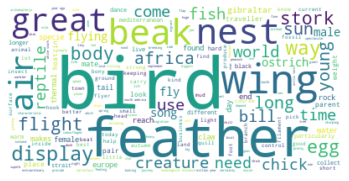

In [4]:
# Create and generate a word cloud image:
text = ' '.join(utterances)
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

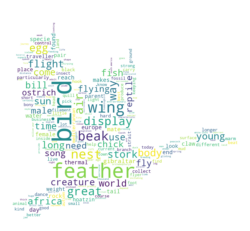

In [5]:
mask = np.array(Image.open("masks/bird.png"))

wordcloud = WordCloud(background_color="white",mask = mask).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#plt.figure(figsize=(60, 80)) #resize?
#plt.show()

In [9]:
text_for_bar = text.split(" ")
counts = Counter(text_for_bar)

print(counts)

Counter({'bird': 82, 'feather': 44, 'wing': 23, 'like': 20, 'nest': 16, 'beak': 15, 'air': 14, 'stork': 13, 'great': 13, 'display': 13, 'way': 12, 'egg': 11, 'flight': 10, 'body': 10, 'africa': 9, 'long': 9, 'young': 9, 'sun': 9, 'world': 8, 'creature': 8, 'fish': 8, 'bill': 8, 'time': 8, 'use': 7, 'chick': 7, 'reptile': 7, 'flying': 7, 'fly': 7, 'male': 7, 'song': 7, 'ostrich': 7, 'gibraltar': 7, 'come': 6, 'found': 6, 'year': 6, 'makes': 6, 'tail': 6, 'need': 6, 'end': 6, 'water': 6, 'mate': 6, 'thermal': 6, 'reach': 6, 'day': 6, 'europe': 6, 'traveller': 5, 'pair': 5, 'parent': 5, 'weight': 5, 'place': 5, 'hoatzin': 5, 'particularly': 5, 'different': 5, 'black': 5, 'hard': 5, 'warm': 5, 'rock': 5, 'specie': 5, 'longer': 5, 'dance': 5, 'south': 5, 'mediterranean': 5, 'pick': 4, 'flyer': 4, 'small': 4, 'town': 4, 'strong': 4, 'filament': 4, 'quill': 4, 'surface': 4, 'hook': 4, 'kind': 4, 'animal': 4, 'fossil': 4, 'little': 4, 'million': 4, 'ago': 4, 'foot': 4, 'head': 4, 'bony': 4, 'c

Shape of the array =  (1143,)


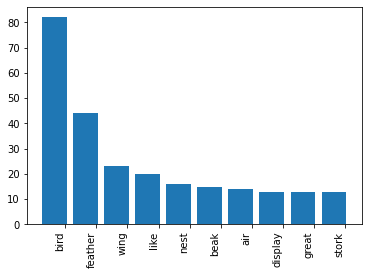

In [8]:
labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

print("Shape of the array = ", np.shape(values));

bar_width = 0.35

n_max = 10
plt.bar(indexes[:n_max], values[:n_max])

# add labels
plt.xticks(indexes[:n_max] + bar_width, labels[:n_max], ha='right', rotation = 90)
plt.show()

In [24]:
print(labels)

['bird' 'feather' 'wing' ... 'half' 'wired' 'attracts']


In [22]:
#preprocessed_subtitles.save('./preprocessed_sub.txt')